In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import time

In [2]:
tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)

In [3]:
prices = data.history(start='2019-01-01', end='2019-04-01').Close
returns = prices.pct_change().dropna()

In [4]:
print(type(prices))
prices

<class 'pandas.core.series.Series'>


Date
2018-12-31    37.951195
2019-01-02    37.994488
2019-01-03    34.209972
2019-01-04    35.670368
2019-01-07    35.590961
                ...    
2019-03-25    45.604332
2019-03-26    45.133163
2019-03-27    45.539093
2019-03-28    45.599495
2019-03-29    45.896694
Name: Close, Length: 62, dtype: float64

Text(0, 0.5, 'Prices')

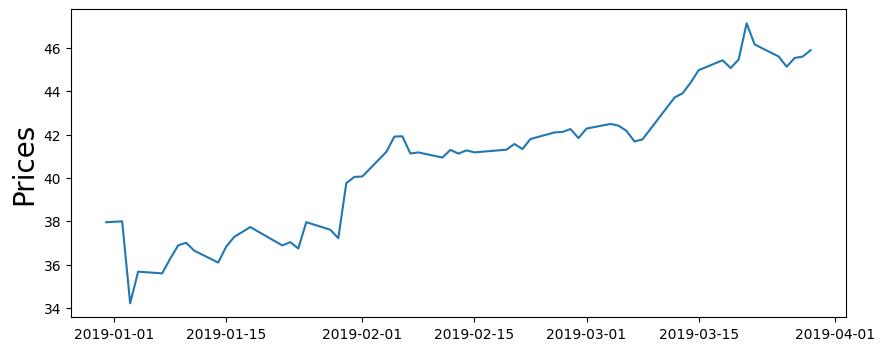

In [5]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Return')

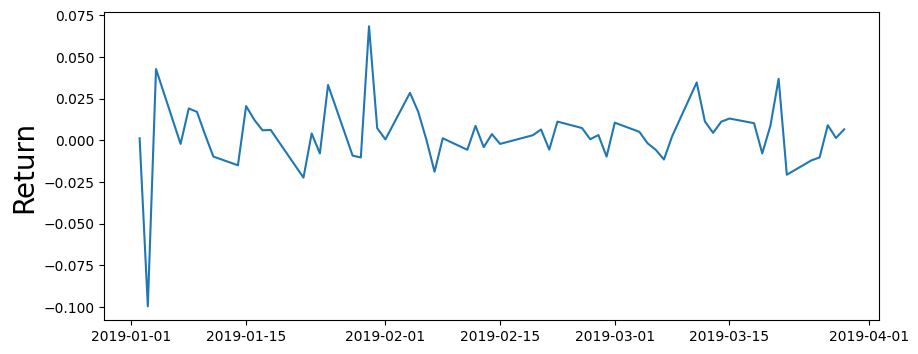

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

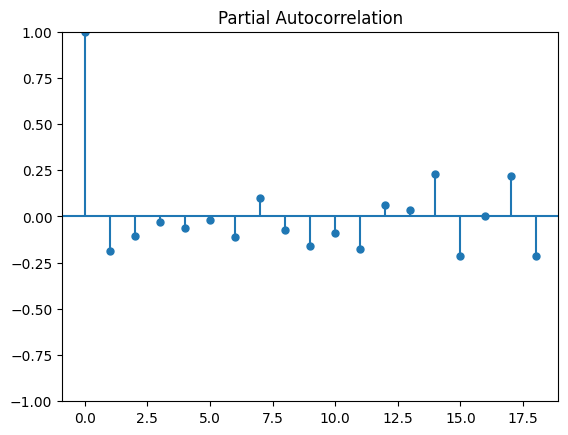

In [7]:
plot_pacf(returns)
plt.show()

In [ ]:
plot_acf(returns)
plt.show()

In [ ]:
prediction_start = 21
prediction_end = 31
actual_data = returns[:prediction_end]

def predict(current_data, order):
    start_time = time.time_ns()
    for date, r in returns.iloc[prediction_start:prediction_end].items():
        model = ARIMA(current_data, order=order).fit()

        prediction = model.forecast()
        prediction_series = pd.Series(prediction.values, index=[date])
        current_data = current_data.append(prediction_series)
    
    elapsed_time = (time.time_ns() - start_time) / 1e6
    formatted_time = f"Execution time: {round(elapsed_time, 2)} [ms]"
    return current_data, formatted_time

def plot_prediction(current_data):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(actual_data, label="Actual data")
    ax.plot(prediction, label="prediction")
   # plt.axvline(x = prediction_start, color = 'g', label = 'extrapolation start')
    ax.set_xlabel("Date")
    ax.set_ylabel("Percentage price change")
    plt.show()
    
def calculate_rms(prediction):
    actual_data =  returns[prediction_start:prediction_end]
    print("RMS: %r " % round(np.sqrt(np.mean((prediction - actual_data) ** 2)), 3))

## AR(1)

In [ ]:
current_data = returns[:prediction_start]
order = (1,0,0)

current_data, elapsed_time = predict(current_data, order)

In [ ]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## AR(5)

In [ ]:
current_data = returns[:prediction_start]
order = (5,0,0)

current_data, elapsed_time = predict(current_data, order)

In [ ]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## ARMA(5,5)

In [ ]:
current_data = returns[:prediction_start]
order = (5,0,5)

current_data, elapsed_time = predict(current_data, order)

In [ ]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## ARCH

In [ ]:
#!pip install arch

from arch import arch_model
returns

In [ ]:
# a standard GARCH(1,1) model
garch = arch_model(returns, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

# one-step out-of sample forecast
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]